<a href="https://colab.research.google.com/github/ultimatecrack/machine-learning/blob/master/practice/Model%20saving%20for%20future%20use/Model%20Saving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Model Saving

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000

In [4]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [5]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

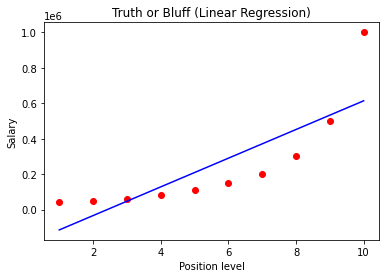

In [7]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

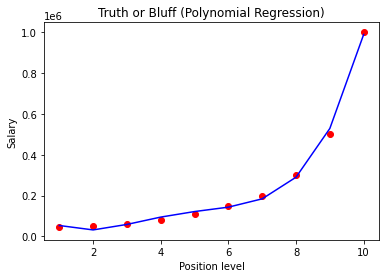

In [8]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

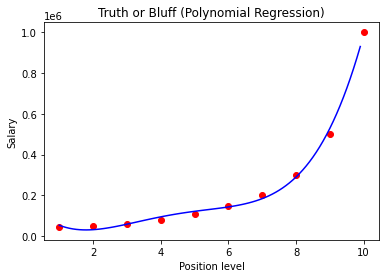

In [9]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [10]:
# Predicting a new result with Linear Regression
y_pred = lin_reg.predict(np.array([6.5]).reshape(1, 1))
print(y_pred)

[330378.78787879]


In [11]:
# Predicting a new result with Polynomial Regression
lin_reg_2.predict(poly_reg.fit_transform(np.array([6.5]).reshape(1, 1)))

array([158862.45265155])

#Saving the model object into file and using on need without training again.

In [12]:
#Saving model using python's pickle, which is used to serialize the object into file
import pickle

In [13]:
with open('polynomial_trained_model', 'wb') as f:
    pickle.dump(lin_reg_2, f)

In [14]:
with open('polynomial_trained_model', 'rb') as f:
    my_model = pickle.load(f)

In [15]:
my_model.predict(poly_reg.fit_transform(np.array([6.5]).reshape(1, 1)))

array([158862.45265155])

In [16]:
#There is another method to do the same task using sklearn's joblib which is more efficient when there is large numpy array.
from joblib import load, dump

In [17]:
#save model
dump(lin_reg_2, 'my_model.joblib') 

['my_model.joblib']

In [18]:
#load model
mera_model = load('my_model.joblib') 

In [19]:
mera_model.predict(poly_reg.fit_transform(np.array([6.5]).reshape(1, 1)))

array([158862.45265155])